In [3]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph # framework that helps you design and manage the flow of tasks in your application using graphs 

In [ ]:
# We now crate a state which is data structure to hold information about the state of our application
class AgentState(TypedDict): # our state schema
    greeting_message: str

def greeting_node(state: AgentState) -> AgentState:
    '''Simple node that adds a greeting message to the state'''
    state["greeting_message"] = "Hello, World! from" + state["greeting_message"]
    return state

In [7]:
graph = StateGraph(AgentState)
graph.add_node("Greeter", greeting_node)

# Now we have to set up start and end of the graph
# for imageine this start -> greeter -> end
# 1st way
graph.set_entry_point("Greeter")
graph.set_finish_point("Greeter")
# the reasone we set both entry and exit point to greeter is because this is a simple graph with only one node

app = graph.compile()

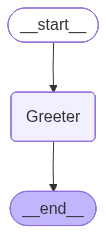

In [8]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [9]:
result = app.invoke({"greeting_message": "Aum!"})
result["greeting_message"]

'Hello, World! fromAum!'